In [26]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cloth_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [27]:
#Displaying the head of the data
cloth_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


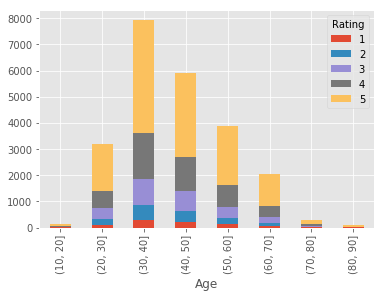

In [28]:
# Exploratory Data Analysis
#What age group has given what types of Ratings?
cloth_df.groupby(['Rating', pd.cut(cloth_df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

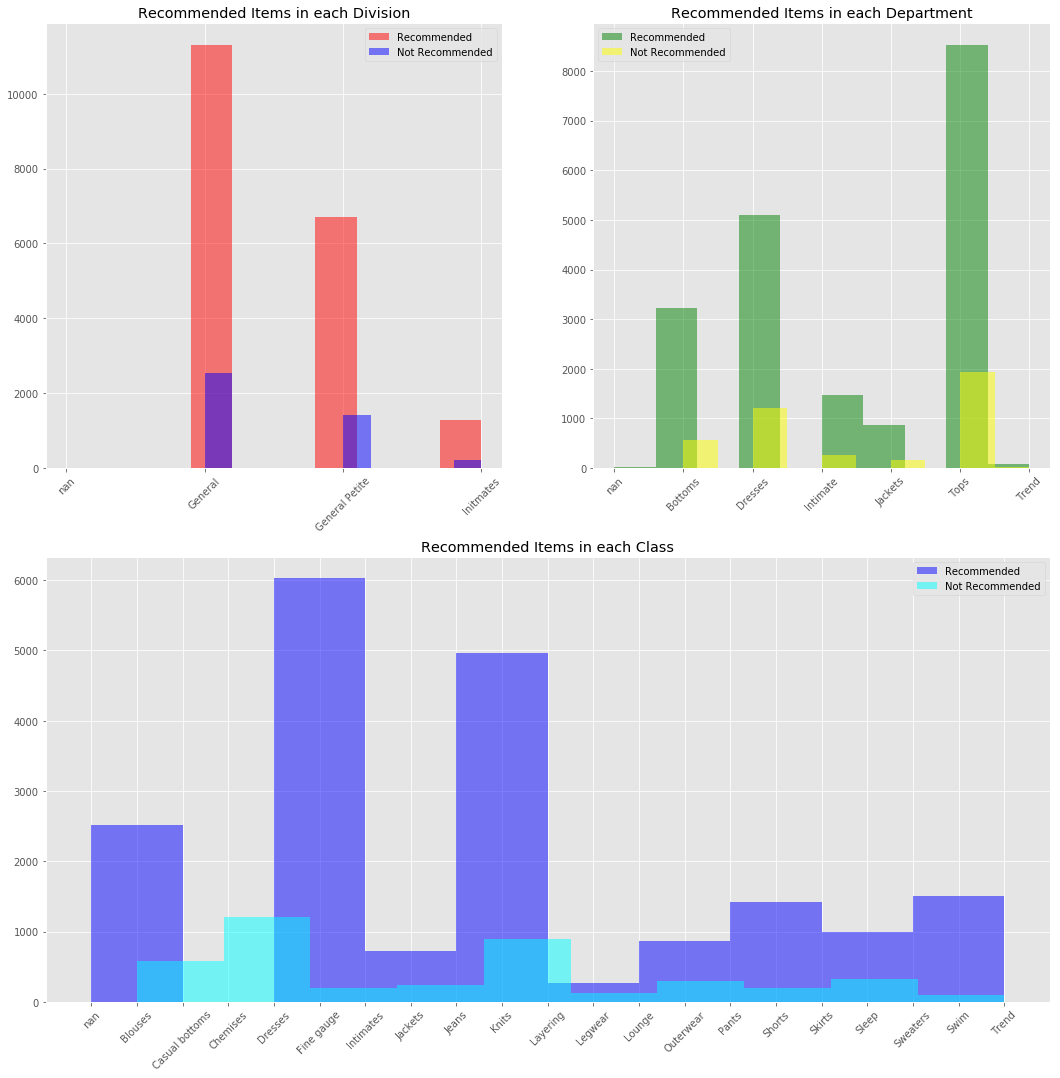

In [29]:
#What are recommended in each Division, Class, department of Clothes?
rd = cloth_df[cloth_df['Recommended IND'] == 1] # recommended
nrd = cloth_df[cloth_df['Recommended IND'] == 0] # not recommended
plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = plt.hist(rd['Division Name'], color = "red", alpha = 0.5, label = "Recommended")
ax1 = plt.hist(nrd['Division Name'], color = "blue", alpha = 0.5, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = plt.hist(rd['Department Name'], color="green", alpha = 0.5, label = "Recommended")
ax2 = plt.hist(nrd['Department Name'], color="yellow", alpha = 0.5, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = plt.hist(rd['Class Name'], color="blue", alpha = 0.5, label = "Recommended")
ax3 = plt.hist(nrd['Class Name'], color="cyan", alpha = 0.5, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

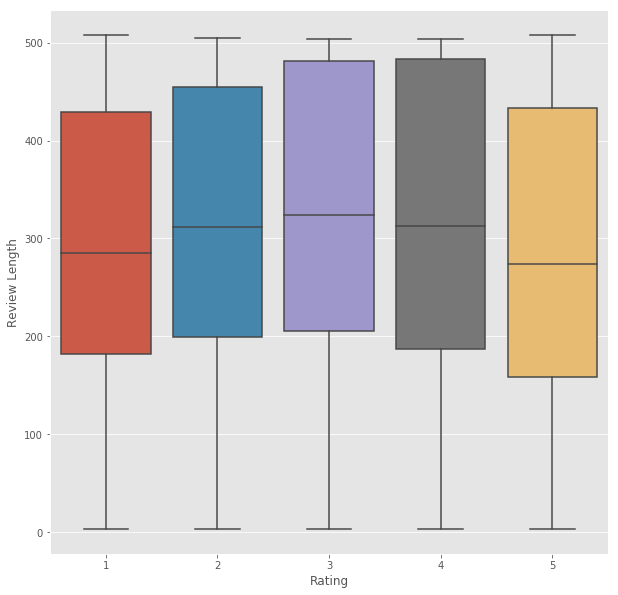

In [31]:
cloth_df['Review Length'] = cloth_df['Review Text'].astype(str).apply(len)
cloth_df.head()
#Rating vs Review length
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=cloth_df)

In [19]:
#Displaying Columns of the dataset
cloth_df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Review Length'],
      dtype='object')

In [20]:
#Finding the distinct clothing items covered by the dataset
distinct_items = len(set(cloth_df['Clothing ID']))
print ('The dataset contains', distinct_items, 'Clothing Items')

The dataset contains 1206 Clothing Items


In [21]:
#The most poular items in the dataset and displaying the top 10
popular_table = cloth_df.groupby('Clothing ID').size()
popular_table = popular_table.reset_index(name= 'Count').nlargest(100,'Count')
popular_table.head(10)

,Clothing ID,Count
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


In [22]:
#Creating a new data frame which contains only clothing items and reviews
result = cloth_df
result = result.drop(columns = ['Unnamed: 0', 'Age', 'Title', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'])
result.reset_index( drop = True, inplace = True)

#Sorting the dataframe by clothing ID and removing records where there are no reviews
result = result.sort_values('Clothing ID')
result = result.dropna()
result.head()

,Clothing ID,Review Text,Review Length
22742,1,Originally i bought this in black and white. r...,386
22749,1,"I love this tank, it is so comfortable but it ...",140
22743,1,Love this tank. material and fit are great. lo...,88
876,2,I just adore this top! it is so comfy and styl...,365
16384,3,I love this sweater. definite classic. i get l...,71


In [23]:
#Joining the reviews for each clothing ID 
result = result.groupby('Clothing ID')['Review Text'].apply(' '.join).reset_index()
result.head()

,Clothing ID,Review Text
0,1,Originally i bought this in black and white. r...
1,2,I just adore this top! it is so comfy and styl...
2,3,I love this sweater. definite classic. i get l...
3,4,This sweater is so comfy and classic - it bala...
4,5,I'm currently on the prowl for the other color...


In [24]:
#Creating a dataframe for only the popular items and their reviews
popular_df = pd.merge(popular_table, result, on='Clothing ID')
popular_df.head()

,Clothing ID,Count,Review Text
0,1078,1024,This dress is extremely flattering on and look...
1,862,806,This is a great shirt. it's super comfortable ...
2,1094,756,The catalog shot and model shot are completely...
3,1081,582,I like the way the skirt of the dress swings w...
4,872,545,This top is much nicer than expected.....the f...


In [3]:
#importing the nltk library
import nltk
nltk.download('punkt')


In [2]:
#Combining all the reviews for all the popular items into a huge text corpus
Reviews = popular_df['Review Text']
Reviews = [str(i) for i in Reviews]
text = ''.join(Reviews)


In [0]:
#Defining Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#Creating a list of words from the reviews which are not stopwords and only consist of alphabets
wordset = []
for i in nltk.word_tokenize(text):
  wordset.append(i)
wordset = [word for word in wordset if word.lower() not in stop_words and word.isalpha()]

In [0]:
#Checking the length of the popular list
print('The number of words in the popular reviews which are not stopwords are' ,len(wordset))

The number of words in the popular reviews which are not stopwords are 482899


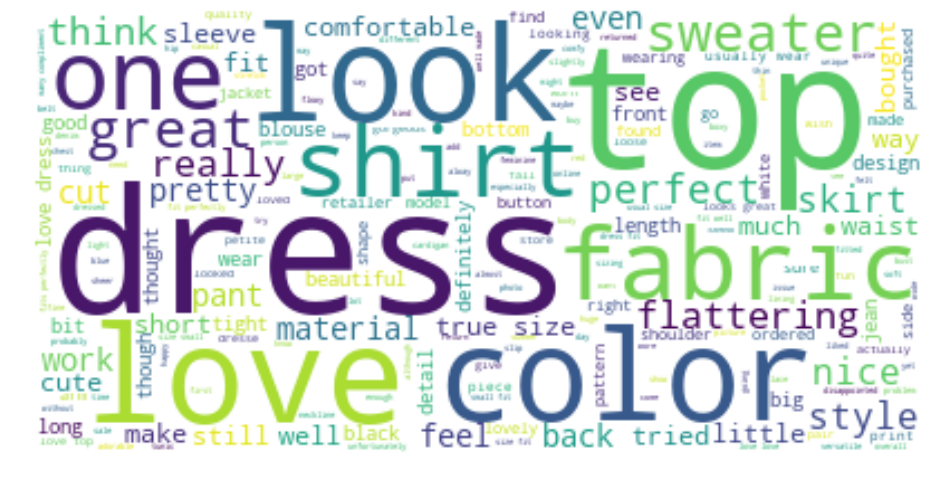

In [0]:
#Wordcloud visualisation to see which words stand out
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white').generate(' '.join(wordset))
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
#Importing nltk libraries for tagging
import nltk
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
#part of speech tagging for all words in the inital set of words
tagged=nltk.pos_tag(wordset)

In [0]:
#Checking if all words are tagged
len(tagged)

482899

In [0]:
#Finding only adjective types in the initial set and creating a new list
final_wordset = []
for word in tagged:
  if 'JJ' in word[1]:
    final_wordset.append(word[0])

In [0]:
#Checking the number of adjectives found
len(final_wordset)

124607

In [0]:
#Finding the top 50 adjectives
# Shortening to a list of words to ones which have been repeated atleast 1000 times 
import nltk
fdist=nltk.FreqDist(final_wordset)
print(fdist.most_common(50))

[('top', 4841), ('great', 4518), ('small', 3377), ('little', 2508), ('soft', 2354), ('fit', 2352), ('wear', 2256), ('comfortable', 2191), ('large', 2107), ('nice', 2046), ('fabric', 1878), ('perfect', 1769), ('beautiful', 1733), ('good', 1413), ('much', 1404), ('big', 1392), ('black', 1370), ('dress', 1304), ('short', 1287), ('true', 1245), ('white', 1183), ('petite', 1176), ('cute', 972), ('regular', 910), ('many', 861), ('right', 841), ('loose', 785), ('casual', 783), ('high', 772), ('gorgeous', 768), ('tight', 749), ('usual', 713), ('long', 681), ('blue', 673), ('different', 650), ('thin', 640), ('super', 634), ('overall', 604), ('sure', 583), ('green', 579), ('material', 550), ('online', 543), ('easy', 542), ('wide', 542), ('wish', 537), ('happy', 530), ('red', 526), ('smaller', 496), ('extra', 493), ('unique', 478)]


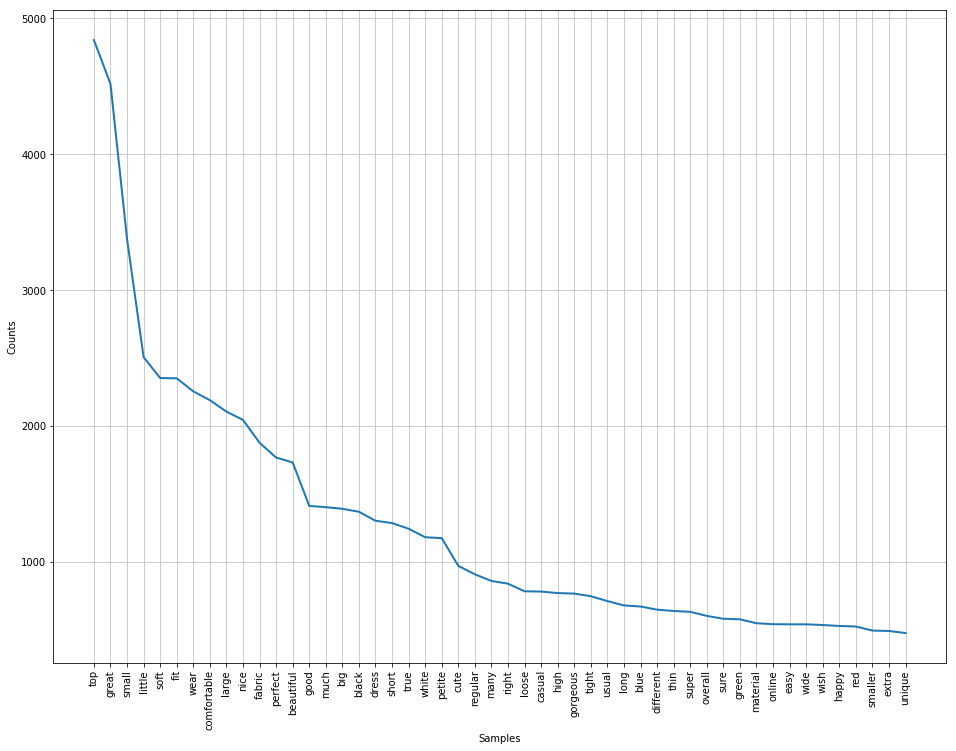

In [0]:
#plotting the most popular 50 words
plt.figure(figsize=(16,12))
fdist.plot(50)

In [0]:
#Getting only the adjectives and not their count
popularity_words = [x[0] for x in fdist.most_common(50)]

In [0]:
#Creating a new dataframe for prediction purposes
new_df = result

In [0]:
#Creating a column for each of the 50 adjectives 
for word in popularity_words:
  new_df[word] = np.nan

In [0]:
#Checking the columns made
new_df.columns

Index(['Clothing ID', 'Review Text', 'top', 'great', 'small', 'little', 'soft',
       'fit', 'wear', 'comfortable', 'large', 'nice', 'fabric', 'perfect',
       'beautiful', 'good', 'much', 'big', 'black', 'dress', 'short', 'true',
       'white', 'petite', 'cute', 'regular', 'many', 'right', 'loose',
       'casual', 'high', 'gorgeous', 'tight', 'usual', 'long', 'blue',
       'different', 'thin', 'super', 'overall', 'sure', 'green', 'material',
       'online', 'easy', 'wide', 'wish', 'happy', 'red', 'smaller', 'extra',
       'unique'],
      dtype='object')

In [1]:
##Skip this step as we already got this stored in a new excel file. It takes a long time to run
#Populating the new dataset for count values of each adjective
# i = 0
# for review in new_df['Review Text']:
#   for word in popularity_words:
#     if word in nltk.word_tokenize(review):
#       b = (nltk.word_tokenize(review)).count(word)
#       new_df.loc[i, word] = b
#     else:
#       pass
#   i += 1 

In [0]:

##Skip this step as we already got this stored in a new excel file
##This step is only necesscary for the professor the previous code takes a long 
##time to run
#final_df = new_df
#final_df = final_df.fillna(0)
#final_df.to_csv('Adjectives_Frame.csv')


In [0]:
#Do this step with the dataset 'Adjectives_frame.csv'
final_df = pd.read_csv('Adjectives_frame.csv')

In [0]:
#creating a new variable called Popular, which denotes whether the product is popular or unpopular
final_df['Popular'] = np.nan

In [0]:
#Checking the dataframe
final_df.tail()

,Unnamed: 0,Clothing ID,Review Text,dress,size,top,love,fit,like,wear,...,however,design,feel,enough,front,go,model,sale,looked,definitely
1174,1174,1200,Bought this dress without trying it on but lis...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1175,1175,1202,"I'm taking this to hawaii for the holidays, i'...",9.0,3.0,0.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1176,1176,1203,Love these tanks so much i have them in every ...,0.0,2.0,2.0,1.0,1.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1177,1177,1204,I love these pants. i have them in navy and ca...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,1178,1205,Just received my second pair of pilcro in the ...,0.0,1.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#Dropping a redundant index column
final_df = final_df.drop(columns = ['Unnamed: 0'])

In [0]:
#Finding whether the clothing item is popular or unpopular and filling the dataset column 'Popular'
Popular = []
for cloth in final_df['Clothing ID']:
  if cloth in popular_table['Clothing ID']:
    Popular.append(1)
  else:
    Popular.append(0) 
final_df['Popular'] = Popular

In [0]:
#Checking the dataset
final_df.head()

,Clothing ID,Review Text,dress,size,top,love,fit,like,wear,great,...,design,feel,enough,front,go,model,sale,looked,definitely,Popular
843,867,"This sweater is the bomb. it's soft, flatterin...",14.0,99.0,182.0,100.0,86.0,78.0,80.0,79.0,...,22.0,9.0,24.0,25.0,17.0,28.0,22.0,20.0,23.0,1
165,176,This one pulled across my shoulders and neck i...,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
671,693,"I love these pants. like, obsessively love, li...",0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1070,1095,....that's what i look like wearing this dress...,523.0,185.0,57.0,99.0,147.0,106.0,101.0,65.0,...,27.0,27.0,23.0,22.0,23.0,30.0,12.0,26.0,24.0,1
212,223,"Warm and cozy tights for my daughter, she love...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [68]:
#Checking whether there are 100 popular items
Popular.count(1)

100

In [0]:
#Creating the Logistic regression model and feeding it the shuffled data
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
final_df = shuffle(final_df)

X = final_df[final_df.columns[2:-1]]
y = final_df['Popular']


X_train = X[:824]
y_train = y[:824]
X_Val = X[824:]
y_Val = y[824:]



In [0]:
#Specifying the Model and fitting the data
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#Saving the prediction values 
pred = lr.predict(X_Val)

In [0]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_Val, pred))
print (accuracy_score(y_Val, pred))

conf = pd.DataFrame(confusion_matrix(y_Val, pred), index = ['Unpopular', 'popular'], 
                    columns = ['Predicted Unpopular', 'Predicted Popular'])
conf

[[319   6]
 [  7  23]]
0.9633802816901409


,Predicted Unpopular,Predicted Popular
Unpopular,319,6
popular,7,23


In [0]:
#Decision Tree model and its confusion matrix

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred2 = dt.predict(X_Val)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_Val, pred2))
print (accuracy_score(y_Val, pred2))
conf = pd.DataFrame(confusion_matrix(y_Val, pred2), index = ['Unpopular', 'popular'], columns = 
                    ['Predicted Unpopular', 'Predicted Popular'])
conf

[[321   4]
 [  3  27]]
0.9802816901408451


,Predicted Unpopular,Predicted Popular
Unpopular,321,4
popular,3,27
